<a href="https://colab.research.google.com/github/cristhian2900/Data_Science/blob/main/Netflix_Prize_Shows_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
dataset_path = "/content/netfilx_prices"

In [59]:
dataset_file = os.path.join(dataset_path, "imdb.csv")


In [60]:
dataset = pd.read_csv(dataset_file)

In [61]:
print(dataset.head())

   Unnamed: 0                          title    year            kind  \
0           0                Dinosaur Planet  2003.0  tv mini series   
1           1                      Character  2021.0           movie   
2           2              Get Up and Dance!  1994.0     video movie   
3           3  The Rise and Fall of El Chapo  2016.0        tv movie   
4           4                    Sick - IMDb     NaN             NaN   

                                    genre  rating   vote            country  \
0  ['Documentary', 'Animation', 'Family']     7.7  474.0  ['United States']   
1         ['Crime', 'Horror', 'Thriller']     8.3   46.0          ['Japan']   
2                              ['Family']     8.1   18.0  ['United States']   
3                         ['Documentary']     6.9   42.0  ['United States']   
4                            ['Thriller']     NaN    NaN  ['United States']   

       language                                               cast  \
0   ['English']       

In [62]:
dataset.dtypes

,0
Unnamed: 0,int64
title,object
year,float64
kind,object
genre,object
rating,float64
vote,float64
country,object
language,object
cast,object


In [64]:
dataset['year'] = pd.to_numeric(dataset['year'], errors='coerce').fillna(0).astype(int)  # handle errors and NaNs
dataset['rating'] = pd.to_numeric(dataset['rating'], errors='coerce').fillna(0).astype(float)  # handle errors and NaNs
dataset['vote'] = pd.to_numeric(dataset['vote'], errors='coerce').fillna(0).astype(int)  # handle errors and NaNs
dataset['runtime'] = pd.to_numeric(dataset['runtime'], errors='coerce').fillna(0).astype(int) # handle errors and NaNs


In [65]:
dataset.dtypes

,0
Unnamed: 0,int64
title,object
year,int64
kind,object
genre,object
rating,float64
vote,int64
country,object
language,object
cast,object


In [66]:
list_columns = ['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']
for col in list_columns:
    dataset[col] = dataset[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])


In [67]:
print(dataset.dtypes)

Unnamed: 0      int64
title          object
year            int64
kind           object
genre          object
rating        float64
vote            int64
country        object
language       object
cast           object
director       object
composer       object
writer         object
runtime         int64
dtype: object


In [69]:
print(dataset[['year', 'rating', 'vote', 'runtime']].describe())

              year       rating          vote      runtime
count  9826.000000  9826.000000  9.826000e+03  9826.000000
mean   1980.529310     6.084368  1.932442e+04    87.529819
std     168.549933     2.265474  9.376581e+04    67.396130
min       0.000000     0.000000  0.000000e+00     0.000000
25%    1989.000000     5.600000  1.390000e+02    60.000000
50%    1999.000000     6.700000  1.123500e+03    91.000000
75%    2003.000000     7.500000  6.337250e+03   107.000000
max    2023.000000     9.600000  2.462087e+06  1620.000000


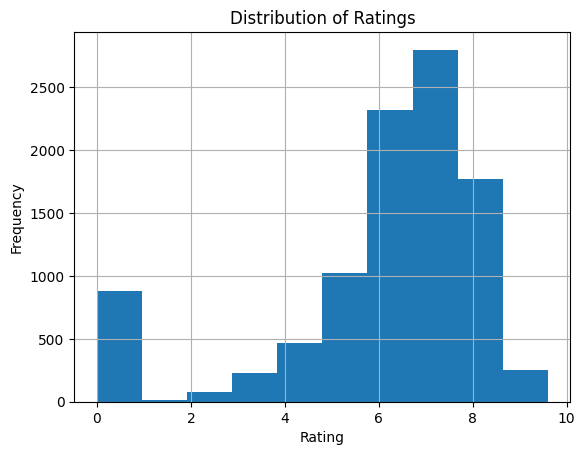

In [70]:
dataset['rating'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

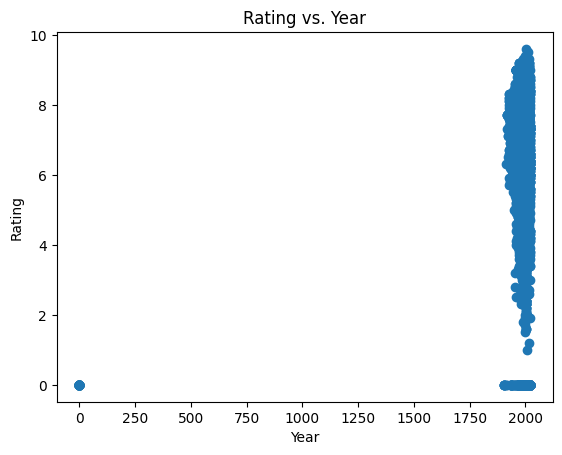

In [72]:
plt.scatter(dataset['year'], dataset['rating'])
plt.title('Rating vs. Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

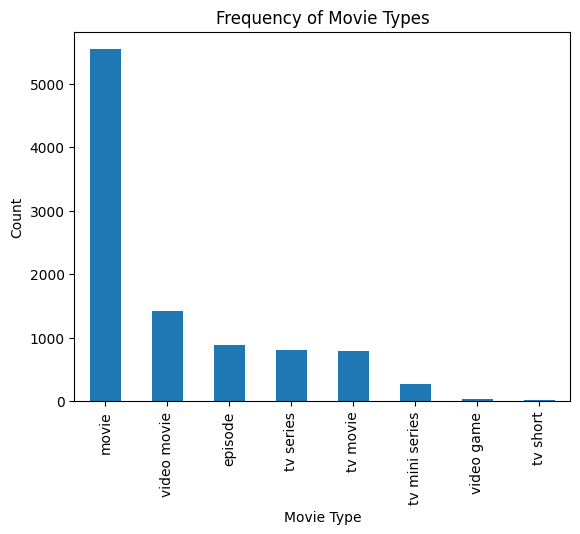

In [74]:
dataset['kind'].value_counts().plot(kind='bar')
plt.title('Frequency of Movie Types')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.show()

In [77]:
#feature engineering
dataset['title_length'] = dataset['title'].astype(str).apply(len)
dataset['num_genres'] = dataset['genre'].apply(len)
dataset['is_movie'] = dataset['kind'].apply(lambda x: 1 if x == 'movie' else 0)


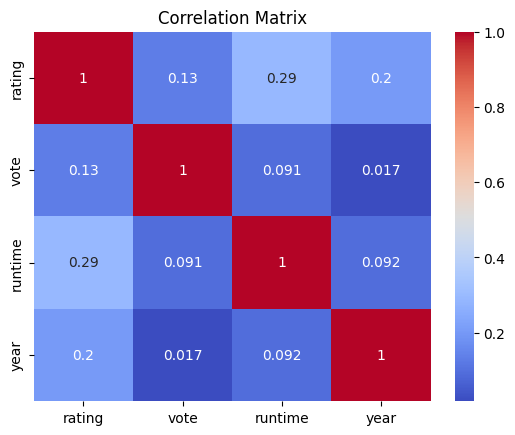

In [79]:
correlation_matrix = dataset[['rating', 'vote', 'runtime', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
"""
1. Can we design a recommendation system that suggests similar content to users based on their preferences (e.g., previously watched genres, languages, and ratings)
2. How can Netflix titles be grouped into clusters based on features such as genre, runtime, release year, and language?
3. Can we classify Netflix titles into their respective genres based on attributes such as runtime, IMDb rating, and language?
"""

' \n1. Can we design a recommendation system that suggests similar content to users based on their preferences (e.g., previously watched genres, languages, and ratings)\n2. How can Netflix titles be grouped into clusters based on features such as genre, runtime, release year, and language?\n'

In [49]:
def convert_to_list(x):
  try:
    return ast.literal_eval(x)
  except (SyntaxError, ValueError):
    return []


In [51]:
dataset['genre'] = dataset['genre'].apply(convert_to_list)
dataset['country'] = dataset['country'].apply(convert_to_list)
dataset['language'] = dataset['language'].apply(convert_to_list)


In [52]:
dataset.fillna('', inplace=True)

<ipython-input-52-ba057eef1c2b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.fillna('', inplace=True)


In [53]:
print(dataset.head( ))

                           title    year            kind  \
0                Dinosaur Planet  2003.0  tv mini series   
1                      Character  2021.0           movie   
2              Get Up and Dance!  1994.0     video movie   
3  The Rise and Fall of El Chapo  2016.0        tv movie   
4                    Sick - IMDb                           

                              genre rating   vote          country  \
0  [Documentary, Animation, Family]    7.7  474.0  [United States]   
1         [Crime, Horror, Thriller]    8.3   46.0          [Japan]   
2                          [Family]    8.1   18.0  [United States]   
3                     [Documentary]    6.9   42.0  [United States]   
4                        [Thriller]                [United States]   

     language                                               cast  \
0   [English]              ['Christian Slater', 'Scott Sampson']   
1  [Japanese]  ['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...   
2   [English] 

In [11]:
print(file_name)

netflix_titles.csv


In [ ]:
#Can we predict the IMDb rating or popularity score of a Netflix title based on its attributes (e.g., genre, runtime, year, country, and language)?